In [1]:
# libreries for pre-processing 
import numpy                      as np
import matplotlib.pyplot          as plt
import pandas                     as pd
from   sklearn.model_selection    import KFold
from   sklearn.impute             import SimpleImputer
from sklearn.preprocessing        import LabelEncoder
import os
# ciao
# libreries for pre-Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler
from sklearn.decomposition   import PCA

# libreries for Machine Learning 
from sklearn.svm                import SVC
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier
from sklearn.metrics            import confusion_matrix, accuracy_score, f1_score,matthews_corrcoef,precision_score
from sklearn.neural_network     import MLPClassifier
from sklearn.model_selection    import KFold,GridSearchCV

from joblib import dump,load

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
dataset = pd.read_csv('breast_cancer.csv')

In [4]:
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
679,841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
680,888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
681,897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


In [5]:
Features = dataset.iloc[:,1:-1]
Labels   = dataset.iloc[:,-1]
print(Features.shape)
print(Labels.shape)

(683, 9)
(683,)


In [6]:
if Features.isna().values.any():
    print("There are NaN values")

There are NaN values


Check NaN values

In [7]:
imputer  = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(Features) # for only the columns with numerical values
Features = imputer.transform(Features)
Features = pd.DataFrame(Features)

In [8]:
if Features.isna().values.any():
    print("There are NaN values")

In [9]:
le = LabelEncoder()
Labels = le.fit_transform(Labels)

In [10]:
# split dataset  --> 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size = 0.2, random_state = 42)

In [11]:
# Dataset Std based on mean and sd of the train set 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

N componenti principali selezionate: [0.6552909  0.08622187 0.06115482 0.05125771 0.04177381 0.03594346
 0.03233371 0.02616229]


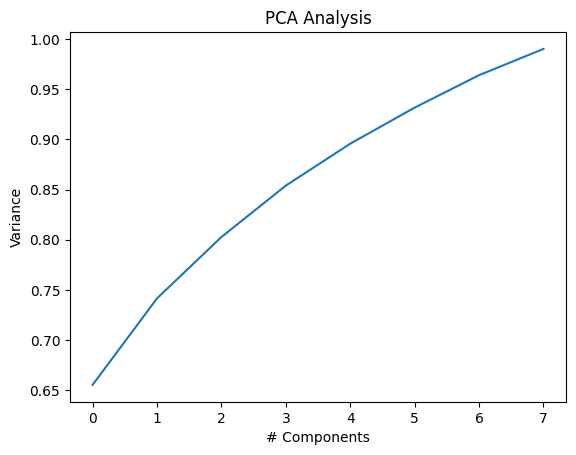

In [12]:
# Principal Component Analisys 
pca = PCA(n_components = 0.98) #6     # number of components to have 98% variance of data --> based on train test
X_train = pca.fit_transform(X_train)

#plot PCA 
exp_var = pca.explained_variance_ratio_
exp_var_cumul = np.cumsum(exp_var)
plt.title('PCA Analysis')
plt.xlabel('# Components')
plt.ylabel('Variance')
plt.plot(exp_var_cumul)

print(f'N componenti principali selezionate: {exp_var}')

X_test = pca.transform(X_test) 

In [13]:
K_outer = 5

outer_cv = KFold(n_splits = K_outer, shuffle=True, random_state = 42)

In [14]:
classifiers = [SVC(kernel = 'sigmoid', random_state = 42),
               KNeighborsClassifier(metric = 'minkowski', p = 2),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               MLPClassifier(hidden_layer_sizes=[5,3,1],max_iter=2000)
               ]

clf_names = ['SVC','kNN','decisionTree','random_forest', 'MLP']

optimization = True

TRAINING WITHOUT OPTIMIZATION

In [15]:

metric_accuracies = np.zeros([K_outer,1]) #len(classifiers)])
metric_precision  = np.zeros([K_outer,1]) #len(classifiers)])
metric_f1score    = np.zeros([K_outer,1]) #len(classifiers)])
metric_mcc        = np.zeros([K_outer,1]) #len(classifiers)])

metric_accuracies_test = np.zeros([len(classifiers)])
metric_precision_test  = np.zeros([len(classifiers)])
metric_f1score_test    = np.zeros([len(classifiers)])
metric_mcc_test        = np.zeros([len(classifiers)])

best_params_per_classifier = {}

for number_classifier in range(len(classifiers)):
	
	print('*******************')
	cl_name = clf_names[number_classifier]
	print(f'Classificatore: {cl_name}')

	if cl_name == 'kNN':
		# Parameters to be optimized for the K-NEAREST NEIGHBOUR classifier
		n_neighbors = list(range(1, 50))
		param_grid = {'n_neighbors': n_neighbors, 'algorithm':['ball_tree', 'kd_tree', 'brute']}
	if cl_name == 'SVC':
		# Parameters to be optimized for the support vector machine classifier
		C_range = np.logspace(-3, 1, 50)
		gamma_range = np.logspace(-4,1,50)
		param_grid = {'C': C_range, 'gamma':gamma_range}
	if cl_name == 'decisionTree':
		# Parameters to be optimized for the decision tree classifier
		param_grid = {'criterion':['gini', 'entropy', 'log_loss']}
	if cl_name == 'random_forest':
		# Parameters to be optimized for the random forest classifier
		n_estimators_range = range(30,500,10)
		param_grid = {'n_estimators': n_estimators_range, 'criterion':['gini', 'entropy', 'log_loss']}
	if cl_name == 'MLP':
		# Parameters to be optimized for the random forest classifier
		param_grid = {'activation':['relu', 'identity', 'logistic', 'tanh'], 'solver':['lbfgs', 'sgd', 'adam']}
		
	pathCl = './Classifier/' + cl_name

	os.makedirs(pathCl, exist_ok=True)
	

	clf_counter = 0
	
	  # Train/Test loop - OUTER LOOP
	for train_index, valid_index in outer_cv.split(X_train, y_train):

		print("")
		print(f'Outer cycle equal to. {clf_counter}')

		# Outer Fold Split
		X_train_out, X_valid = X_train[train_index], X_train[valid_index]
		y_train_out, y_valid = y_train[train_index], y_train[valid_index]

		classifier = classifiers[number_classifier]

		if optimization:
			classifier = GridSearchCV(estimator = classifier,param_grid = param_grid,cv = 5,scoring = 'matthews_corrcoef')
		
		classifier.fit(X_train_out,y_train_out)
		dump(classifier,pathCl + '/' + cl_name + f'{clf_counter}.joblib')

		y_pred = classifier.predict(X_valid)

		cm  = confusion_matrix(y_valid, y_pred)
		#print(cm)
		metric_accuracies[clf_counter] = accuracy_score(y_valid, y_pred)
		metric_precision [clf_counter] = precision_score(y_valid, y_pred)
		metric_f1score   [clf_counter] = f1_score(y_valid, y_pred)
		metric_mcc       [clf_counter] = matthews_corrcoef(y_valid, y_pred)

		clf_counter += 1


	print(metric_mcc)
	idx = np.argmax(metric_mcc,axis=0)
	print(idx)

	best_est = load(pathCl + '/' + cl_name + f'{idx[0]}.joblib')
	prediction_test = best_est.predict(X_test)
	cm  = confusion_matrix(y_test, prediction_test)
	
	plot_confusion_matrix(cm,
                          np.arange(1,2,1), #labels,
                          title=f'Confusion matrix - {cl_name} ',
                          cmap=None,
                          normalize=True)
	
	metric_accuracies_test[number_classifier] = accuracy_score(y_test, prediction_test)
	metric_precision_test [number_classifier] = precision_score(y_test, prediction_test)
	metric_f1score_test   [number_classifier] = f1_score(y_test, prediction_test)
	metric_mcc_test       [number_classifier] = matthews_corrcoef(y_test, prediction_test)

*******************
Classificatore: SVC

Outer cycle equal to. 0

Outer cycle equal to. 1

Outer cycle equal to. 2


KeyboardInterrupt: 